In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Students_Marks_SY1_SY2_SY3.csv")
df

,Roll No,Name,department,Division,Math,Physics,Chemistry,English,Computer
0,1.0,Student_sy_1_A_1,sy_1,A,52.0,60.0,90.0,100.0,40.0
1,2.0,Student_sy_1_A_2,sy_1,A,52.0,53.0,59.0,93.0,46.0
2,3.0,Student_sy_1_A_3,sy_1,A,44.0,94.0,95.0,50.0,79.0
3,4.0,Student_sy_1_A_4,sy_1,A,45.0,42.0,72.0,100.0,91.0
4,5.0,Student_sy_1_A_5,sy_1,A,42.0,78.0,65.0,58.0,94.0
...,...,...,...,...,...,...,...,...,...
715,26.0,Student_sy_3_H_26,sy_3,H,85.0,69.0,71.0,89.0,72.0
716,27.0,Student_sy_3_H_27,sy_3,H,71.0,100.0,86.0,57.0,53.0
717,28.0,Student_sy_3_H_28,sy_3,H,84.0,88.0,69.0,53.0,52.0
718,29.0,Student_sy_3_H_29,sy_3,H,93.0,40.0,75.0,53.0,81.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Roll No     720 non-null    float64
 1   Name        720 non-null    object 
 2   department  720 non-null    object 
 3   Division    720 non-null    object 
 4   Math        720 non-null    float64
 5   Physics     720 non-null    float64
 6   Chemistry   720 non-null    float64
 7   English     720 non-null    float64
 8   Computer    720 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.8+ KB


In [5]:
df.describe()

,Roll No,Math,Physics,Chemistry,English,Computer
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,15.500000,69.673611,69.134722,70.345833,69.008333,70.761111
std,8.661458,18.187032,17.368298,17.653554,17.451062,17.067196
min,1.000000,40.000000,40.000000,40.000000,40.000000,40.000000
25%,8.000000,53.000000,54.000000,54.000000,53.000000,57.000000
50%,15.500000,70.500000,69.000000,71.000000,69.000000,70.000000
75%,23.000000,86.000000,84.000000,85.250000,84.000000,85.000000
max,30.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
df["Total"]=df["Math"]+df["Physics"]+df["Chemistry"]+df["English"]+df["Computer"]

In [7]:
df

,Roll No,Name,department,Division,Math,Physics,Chemistry,English,Computer,Total
0,1.0,Student_sy_1_A_1,sy_1,A,52.0,60.0,90.0,100.0,40.0,342.0
1,2.0,Student_sy_1_A_2,sy_1,A,52.0,53.0,59.0,93.0,46.0,303.0
2,3.0,Student_sy_1_A_3,sy_1,A,44.0,94.0,95.0,50.0,79.0,362.0
3,4.0,Student_sy_1_A_4,sy_1,A,45.0,42.0,72.0,100.0,91.0,350.0
4,5.0,Student_sy_1_A_5,sy_1,A,42.0,78.0,65.0,58.0,94.0,337.0
...,...,...,...,...,...,...,...,...,...,...
715,26.0,Student_sy_3_H_26,sy_3,H,85.0,69.0,71.0,89.0,72.0,386.0
716,27.0,Student_sy_3_H_27,sy_3,H,71.0,100.0,86.0,57.0,53.0,367.0
717,28.0,Student_sy_3_H_28,sy_3,H,84.0,88.0,69.0,53.0,52.0,346.0
718,29.0,Student_sy_3_H_29,sy_3,H,93.0,40.0,75.0,53.0,81.0,342.0


In [8]:
df["Percentage"] = (df["Total"]/500)*100

In [9]:
df

,Roll No,Name,department,Division,Math,Physics,Chemistry,English,Computer,Total,Percentage
0,1.0,Student_sy_1_A_1,sy_1,A,52.0,60.0,90.0,100.0,40.0,342.0,68.4
1,2.0,Student_sy_1_A_2,sy_1,A,52.0,53.0,59.0,93.0,46.0,303.0,60.6
2,3.0,Student_sy_1_A_3,sy_1,A,44.0,94.0,95.0,50.0,79.0,362.0,72.4
3,4.0,Student_sy_1_A_4,sy_1,A,45.0,42.0,72.0,100.0,91.0,350.0,70.0
4,5.0,Student_sy_1_A_5,sy_1,A,42.0,78.0,65.0,58.0,94.0,337.0,67.4
...,...,...,...,...,...,...,...,...,...,...,...
715,26.0,Student_sy_3_H_26,sy_3,H,85.0,69.0,71.0,89.0,72.0,386.0,77.2
716,27.0,Student_sy_3_H_27,sy_3,H,71.0,100.0,86.0,57.0,53.0,367.0,73.4
717,28.0,Student_sy_3_H_28,sy_3,H,84.0,88.0,69.0,53.0,52.0,346.0,69.2
718,29.0,Student_sy_3_H_29,sy_3,H,93.0,40.0,75.0,53.0,81.0,342.0,68.4


In [10]:
df["Grade"] = np.where(
    df["Percentage"] > 90, "A",
    np.where(df["Percentage"]> 80, "B",
    np.where(df["Percentage"]> 70, "C",
    np.where(df["Percentage"]> 60, "D",
    np.where(df["Percentage"]> 50, "E",
    np.where(df["Percentage"]> 40, "F", "FAILED"))))))


In [11]:
df

,Roll No,Name,department,Division,Math,Physics,Chemistry,English,Computer,Total,Percentage,Grade
0,1.0,Student_sy_1_A_1,sy_1,A,52.0,60.0,90.0,100.0,40.0,342.0,68.4,D
1,2.0,Student_sy_1_A_2,sy_1,A,52.0,53.0,59.0,93.0,46.0,303.0,60.6,D
2,3.0,Student_sy_1_A_3,sy_1,A,44.0,94.0,95.0,50.0,79.0,362.0,72.4,C
3,4.0,Student_sy_1_A_4,sy_1,A,45.0,42.0,72.0,100.0,91.0,350.0,70.0,D
4,5.0,Student_sy_1_A_5,sy_1,A,42.0,78.0,65.0,58.0,94.0,337.0,67.4,D
...,...,...,...,...,...,...,...,...,...,...,...,...
715,26.0,Student_sy_3_H_26,sy_3,H,85.0,69.0,71.0,89.0,72.0,386.0,77.2,C
716,27.0,Student_sy_3_H_27,sy_3,H,71.0,100.0,86.0,57.0,53.0,367.0,73.4,C
717,28.0,Student_sy_3_H_28,sy_3,H,84.0,88.0,69.0,53.0,52.0,346.0,69.2,D
718,29.0,Student_sy_3_H_29,sy_3,H,93.0,40.0,75.0,53.0,81.0,342.0,68.4,D


In [12]:
df.to_csv("Student_marks_grade.csv",index=False)

In [13]:
df.describe()

,Roll No,Math,Physics,Chemistry,English,Computer,Total,Percentage
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,15.500000,69.673611,69.134722,70.345833,69.008333,70.761111,348.923611,69.784722
std,8.661458,18.187032,17.368298,17.653554,17.451062,17.067196,39.019285,7.803857
min,1.000000,40.000000,40.000000,40.000000,40.000000,40.000000,246.000000,49.200000
25%,8.000000,53.000000,54.000000,54.000000,53.000000,57.000000,320.000000,64.000000
50%,15.500000,70.500000,69.000000,71.000000,69.000000,70.000000,348.000000,69.600000
75%,23.000000,86.000000,84.000000,85.250000,84.000000,85.000000,374.000000,74.800000
max,30.000000,100.000000,100.000000,100.000000,100.000000,100.000000,461.000000,92.200000


In [14]:
avg_score = df["Total"].mean()
print(avg_score)

348.9236111111111


In [15]:
top_student = df["Grade"].value_counts()
print(top_student)

Grade
D    311
C    275
E     66
B     62
A      4
F      2
Name: count, dtype: int64


***Above 90 --- 4 students*** 

***Above 80 --- 62 students***,

***Above 70 --- 275 students***, 

In [19]:
print(df["Math"].mean())
print(df["Physics"].mean())
print(df["Chemistry"].mean())
print(df["English"].mean())
print(df["Computer"].mean())

69.67361111111111
69.13472222222222
70.34583333333333
69.00833333333334
70.7611111111111


***AVG marks of Maths 69.6***

***AVG marks of Physics 69.1***

***AVG marks of Chemistry 70.3***

***AVG marks of English 69.0***

***AVG marks of Computer 70.7***

In [25]:
high = df.loc[df["Total"].idxmax()]
print(high)

Roll No                    25.0
Name          Student_sy_2_A_25
department                 sy_2
Division                      A
Math                       87.0
Physics                    84.0
Chemistry                  93.0
English                    99.0
Computer                   98.0
Total                     461.0
Percentage                 92.2
Grade                         A
Name: 264, dtype: object


In [26]:
low = df.loc[df["Total"].idxmin()]
print(low)

Roll No                    20.0
Name          Student_sy_3_H_20
department                 sy_3
Division                      H
Math                       57.0
Physics                    53.0
Chemistry                  56.0
English                    40.0
Computer                   40.0
Total                     246.0
Percentage                 49.2
Grade                         F
Name: 709, dtype: object


In [27]:
avg_devision_mark_math = df.groupby(["Division","department"])["Math"].mean()
print(f"{avg_devision_mark_math}   AVG OF MATH  ")

Division  department
A         sy_1          62.766667
          sy_2          73.333333
          sy_3          68.533333
B         sy_1          70.833333
          sy_2          69.966667
          sy_3          70.366667
C         sy_1          65.033333
          sy_2          71.666667
          sy_3          72.333333
D         sy_1          62.700000
          sy_2          67.533333
          sy_3          67.833333
E         sy_1          70.500000
          sy_2          74.833333
          sy_3          68.000000
F         sy_1          73.933333
          sy_2          66.933333
          sy_3          72.166667
G         sy_1          64.200000
          sy_2          71.466667
          sy_3          72.300000
H         sy_1          69.500000
          sy_2          72.833333
          sy_3          72.600000
Name: Math, dtype: float64   AVG OF MATH  


In [28]:
avg_devision_mark_Chemistry= df.groupby(["Division","department"])["Chemistry"].mean()
print(f"{avg_devision_mark_Chemistry}  AVG OF  Chemistry ")

Division  department
A         sy_1          67.733333
          sy_2          68.800000
          sy_3          76.066667
B         sy_1          69.500000
          sy_2          69.966667
          sy_3          75.100000
C         sy_1          69.200000
          sy_2          68.366667
          sy_3          69.933333
D         sy_1          73.833333
          sy_2          71.000000
          sy_3          79.933333
E         sy_1          66.700000
          sy_2          69.533333
          sy_3          63.866667
F         sy_1          71.700000
          sy_2          68.766667
          sy_3          71.033333
G         sy_1          65.200000
          sy_2          70.600000
          sy_3          69.666667
H         sy_1          72.000000
          sy_2          72.566667
          sy_3          67.233333
Name: Chemistry, dtype: float64  AVG OF  Chemistry 


In [29]:
avg_devision_mark_Physics= df.groupby(["Division","department"])["Physics"].mean()
print(f"{avg_devision_mark_Physics}   AVG OF  Physics  ")

Division  department
A         sy_1          69.800000
          sy_2          68.900000
          sy_3          76.200000
B         sy_1          67.433333
          sy_2          70.633333
          sy_3          69.033333
C         sy_1          70.733333
          sy_2          68.700000
          sy_3          70.433333
D         sy_1          62.266667
          sy_2          61.833333
          sy_3          68.600000
E         sy_1          65.366667
          sy_2          68.633333
          sy_3          66.600000
F         sy_1          66.966667
          sy_2          66.633333
          sy_3          72.633333
G         sy_1          68.233333
          sy_2          74.366667
          sy_3          72.300000
H         sy_1          69.333333
          sy_2          71.433333
          sy_3          72.166667
Name: Physics, dtype: float64   AVG OF  Physics  


In [30]:
avg_devision_mark_English = df.groupby(["Division","department"])["English"].mean()
print(f"{avg_devision_mark_English}  AVG OF ENGLISH")

Division  department
A         sy_1          67.800000
          sy_2          69.666667
          sy_3          70.500000
B         sy_1          69.000000
          sy_2          66.000000
          sy_3          73.400000
C         sy_1          69.466667
          sy_2          69.566667
          sy_3          67.333333
D         sy_1          74.500000
          sy_2          68.366667
          sy_3          65.366667
E         sy_1          73.466667
          sy_2          68.400000
          sy_3          68.466667
F         sy_1          65.700000
          sy_2          69.433333
          sy_3          72.300000
G         sy_1          67.900000
          sy_2          65.833333
          sy_3          72.466667
H         sy_1          68.633333
          sy_2          65.900000
          sy_3          66.733333
Name: English, dtype: float64  AVG OF ENGLISH


In [31]:
avg_devision_mark_Computer= df.groupby(["Division","department"])["Computer"].mean()
print(f"{avg_devision_mark_Computer} AVG OF COMPUTER")

Division  department
A         sy_1          66.100000
          sy_2          73.700000
          sy_3          72.633333
B         sy_1          70.700000
          sy_2          72.066667
          sy_3          70.933333
C         sy_1          72.233333
          sy_2          74.800000
          sy_3          70.633333
D         sy_1          73.933333
          sy_2          73.233333
          sy_3          69.500000
E         sy_1          71.666667
          sy_2          68.033333
          sy_3          66.233333
F         sy_1          70.933333
          sy_2          69.166667
          sy_3          77.633333
G         sy_1          74.600000
          sy_2          66.766667
          sy_3          71.966667
H         sy_1          67.566667
          sy_2          68.433333
          sy_3          64.800000
Name: Computer, dtype: float64 AVG OF COMPUTER


In [32]:
avg_department = df.groupby("department")["Percentage"].mean()

In [33]:
avg_div_dep = df.groupby(["Division","department"])["Percentage"].mean()
print(avg_div_dep )

Division  department
A         sy_1          66.840000
          sy_2          70.880000
          sy_3          72.786667
B         sy_1          69.493333
          sy_2          69.726667
          sy_3          71.766667
C         sy_1          69.333333
          sy_2          70.620000
          sy_3          70.133333
D         sy_1          69.446667
          sy_2          68.393333
          sy_3          70.246667
E         sy_1          69.540000
          sy_2          69.886667
          sy_3          66.633333
F         sy_1          69.846667
          sy_2          68.186667
          sy_3          73.153333
G         sy_1          68.026667
          sy_2          69.806667
          sy_3          71.740000
H         sy_1          69.406667
          sy_2          70.233333
          sy_3          68.706667
Name: Percentage, dtype: float64


In [34]:
grade_percent = (df['Grade'].value_counts(normalize=True) * 100).round(2)
print(grade_percent)

Grade
D    43.19
C    38.19
E     9.17
B     8.61
A     0.56
F     0.28
Name: proportion, dtype: float64


In [35]:
top_10_students = df.nlargest(10, 'Total')[['Name', 'Total', 'Percentage', 'Grade']]
print(top_10_students)

                  Name  Total  Percentage Grade
264  Student_sy_2_A_25  461.0        92.2     A
633   Student_sy_3_F_4  459.0        91.8     A
701  Student_sy_3_H_12  459.0        91.8     A
440  Student_sy_2_G_21  455.0        91.0     A
647  Student_sy_3_F_18  449.0        89.8     B
526  Student_sy_3_B_17  446.0        89.2     B
665   Student_sy_3_G_6  445.0        89.0     B
368   Student_sy_2_E_9  443.0        88.6     B
547   Student_sy_3_C_8  443.0        88.6     B
593  Student_sy_3_D_24  443.0        88.6     B


In [36]:
grade_range = df.groupby("Grade")["Total"].agg(['min', 'max', 'std'])
print(grade_range)

         min    max        std
Grade                         
A      455.0  461.0   2.516611
B      402.0  449.0  13.656946
C      351.0  400.0  14.178055
D      301.0  350.0  14.427666
E      252.0  300.0  11.055191
F      246.0  247.0   0.707107


In [37]:
from scipy.stats import iqr
iqr_outliers = iqr(df["Total"])
print(iqr_outliers)

54.0


In [38]:
top_5 = df.nlargest(5, 'Total')[['Name', 'Total', 'Percentage', 'Grade']]
print(top_5)

                  Name  Total  Percentage Grade
264  Student_sy_2_A_25  461.0        92.2     A
633   Student_sy_3_F_4  459.0        91.8     A
701  Student_sy_3_H_12  459.0        91.8     A
440  Student_sy_2_G_21  455.0        91.0     A
647  Student_sy_3_F_18  449.0        89.8     B


In [39]:
last_5 = df.nsmallest(5, 'Total')[['Name', 'Total', 'Percentage', 'Grade']]
print(last_5)


                  Name  Total  Percentage Grade
709  Student_sy_3_H_20  246.0        49.2     F
278   Student_sy_2_B_9  247.0        49.4     F
282  Student_sy_2_B_13  252.0        50.4     E
266  Student_sy_2_A_27  254.0        50.8     E
617  Student_sy_3_E_18  257.0        51.4     E


In [40]:
grade_std = df.groupby('Grade')['Total'].std()
print(grade_std)

Grade
A     2.516611
B    13.656946
C    14.178055
D    14.427666
E    11.055191
F     0.707107
Name: Total, dtype: float64


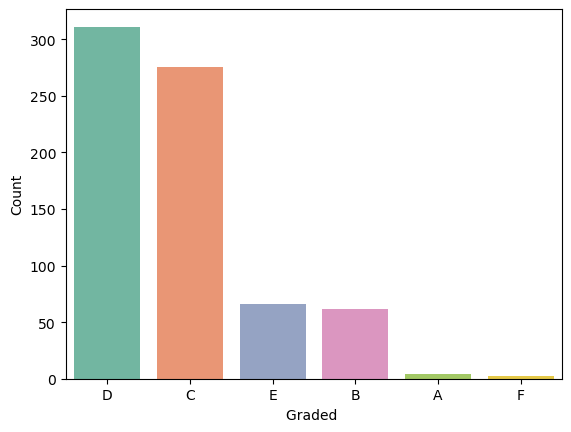

In [41]:
sns.countplot(df,x="Grade", palette='Set2')
plt.xlabel("Graded ")
plt.ylabel("Count")
plt.show()

In [42]:
pass_rate = (df['Grade'] != 'E').mean() * 100


pass_rate 90.83 

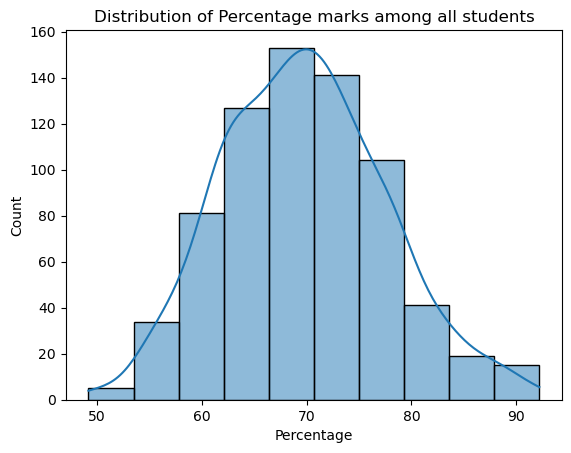

In [44]:
sns.histplot(data=df,x="Percentage",bins=10,kde=True)
plt.ylabel("Count")
plt.xlabel("Percentage")
plt.title("Distribution of Percentage marks among all students")
plt.show()

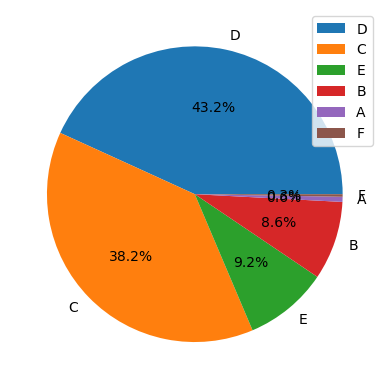

In [45]:
grade_counts = df["Grade"].value_counts()
labels = grade_counts.index
plt.pie(data=df,x=df["Grade"].value_counts(),autopct="%1.1f%%",labels=labels)
plt.legend(labels)
plt.show()

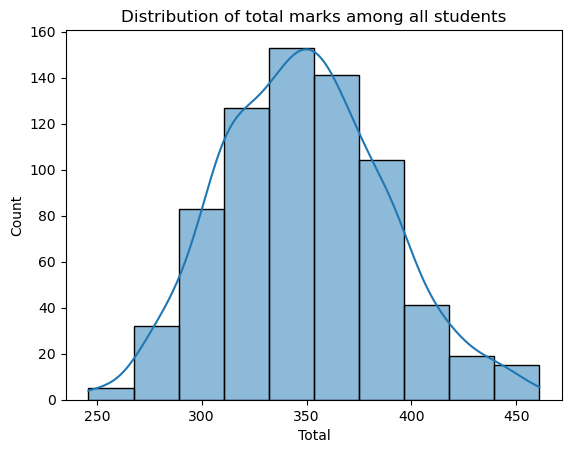

In [46]:
sns.histplot(data=df,x="Total",bins=10,kde=True)
plt.title("Distribution of total marks among all students")
plt.show()

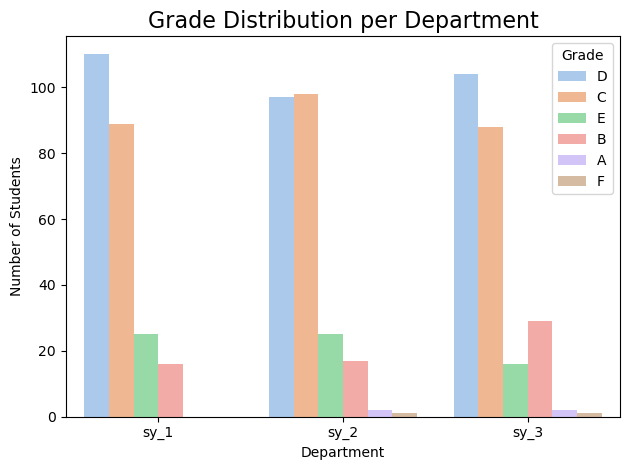

In [47]:
sns.countplot(data=df, x='department', hue='Grade', palette='pastel')

plt.title('Grade Distribution per Department', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Number of Students')
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

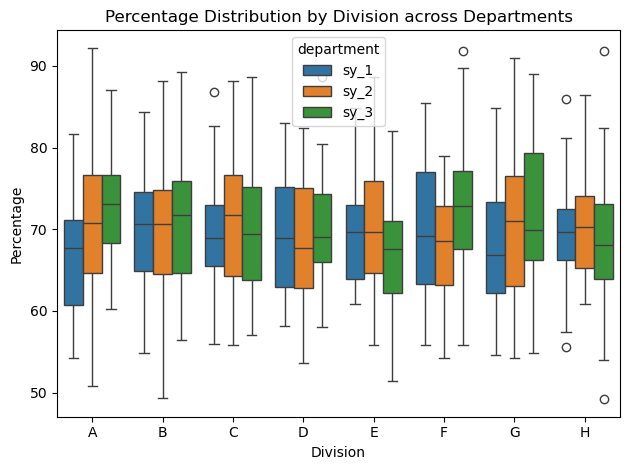

In [48]:
sns.boxplot(data=df, x='Division', y='Percentage', hue='department')
plt.title('Percentage Distribution by Division across Departments')
plt.tight_layout()
plt.show()

 RandomForestClassifier

In [49]:
# x = df[["Math","Physics","Chemistry","English","Computer"]]
# y =df["department"]

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



# model = RandomForestClassifier()
# model.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
# y_pred = model.predict(x_test)
# acc = accuracy_score(y_test,y_pred)*100
# print(f"Model Accuracy is {acc}")

Model Accuracy is 34.02777777777778


In [51]:
# report = classification_report(y_test,y_pred)
# print(report)

              precision    recall  f1-score   support

        sy_1       0.34      0.38      0.36        56
        sy_2       0.45      0.31      0.37        48
        sy_3       0.26      0.33      0.29        40

    accuracy                           0.34       144
   macro avg       0.35      0.34      0.34       144
weighted avg       0.36      0.34      0.34       144



In [52]:
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# x = df[["Math","Physics","Chemistry","English","Computer"]]
# y =df["department"]
# lb = LabelEncoder()
# y = lb.fit_transform(y)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



# model_xg = XGBClassifier() 
# model_xg.fit(x_train,y_train)
# y_pred2 = model_xg.predict(x_test)
# acc = accuracy_score(y_test,y_pred2)*100
# print(f"Model Accuracy is {acc}")

Model Accuracy is 31.944444444444443


In [53]:
# report = classification_report(y_test,y_pred2)
# print(report)

              precision    recall  f1-score   support

           0       0.33      0.30      0.31        56
           1       0.38      0.38      0.38        48
           2       0.25      0.28      0.26        40

    accuracy                           0.32       144
   macro avg       0.32      0.32      0.32       144
weighted avg       0.32      0.32      0.32       144



In [54]:
x = df[["Math","Physics","Chemistry","English","Computer"]]
y =df["department"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(x_train,y_train)
y_pred = kn_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print(f"Model Accuracy is {acc}")

Model Accuracy is 36.11111111111111


In [55]:
x = df[["Math","Physics","Chemistry","English","Computer"]]
y =df["Division"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



kn_model2 = KNeighborsClassifier(n_neighbors=8)
kn_model2.fit(x_train,y_train)
y_pred =kn_model2.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print(f"Model Accuracy is {acc}")

Model Accuracy is 12.5


In [56]:
math = float(input("Math marks"))
physics = float(input("Physics marks"))
chemistry = float(input("Chemistry marks"))
english = float(input("English marks"))
computer = float(input("Computer marks"))




Math marks 90
Physics marks 90
Chemistry marks 90
English marks 90
Computer marks 90


In [57]:
prediction = kn_model.predict([[math, physics, chemistry, english, computer]])
print(f"Predicted department  is {prediction}")

Predicted department  is ['sy_3']


In [58]:
prediction = kn_model2.predict([[math, physics, chemistry, english, computer]])
print(f"Predicted Division  is {prediction}")

Predicted Division  is ['B']
